In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import warnings
from tqdm import tqdm
warnings.simplefilter("ignore")

sns.set(style="darkgrid")
%matplotlib inline

In [3]:
df = pd.read_csv('HW1_var_8.csv', sep=';')

In [4]:
df.sample(5)

,Номер варианта,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
10107,8,1202148,2НДФЛ,Ремонт,0.0,0.49,женский,1,0,Высшее/Второе высшее/Ученая степень,...,0.0,19.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9223,8,1184468,Поступление зарплаты на счет,Покупка автомобиля,0.0,0.48,женский,0,0,незаконченное высшее,...,0.0,5.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5459,8,1109188,2НДФЛ,Покупка недвижимости/ строительство,0.0,0.16,женский,1,0,второе высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,8,1189368,Форма банка (без печати работодателя),Ремонт,1.0,0.45,мужской,1,0,высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6353,8,1127068,Форма банка (без печати работодателя),Ремонт,1.0,0.50,мужской,0,0,среднее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Часть 1
По ходу решения этой части я объединила пункты 1-4 между собой, что соблюдать определенную логику и последовательность. То есть исправляю ошибки и даю пояснения сразу в процессе исследования.

## Исследую распределение по данным и делаю проверку:

In [5]:
# определим категориальные и интервальные признаки

categorical = ['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'INSURANCE_FLAG', 'SEX',
                'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE', 'BANKACCOUNT_FLAG',
                'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS', 'if_zalog',
                'dlq_exist', 'thirty_in_a_year', 'sixty_in_a_year',
                'ninety_in_a_year', 'thirty_vintage', 'sixty_vintage', 'ninety_vintage']

numeric = ['DTI', 'FULL_AGE_CHILD_NUMBER', 'DEPENDANT_NUMBER', 'Period_at_work', 'age',
            'max90days', 'max60days', 'max30days', 'max21days', 'max14days',
            'avg_num_delay', 'Active_to_All_prc', 'numAccountActiveAll', 'numAccountClosed',
            'sum_of_paym_months', 'all_credits', 'Active_not_cc', 'own_closed', 'min_MnthAfterLoan',
            'num_AccountActive180', 'num_AccountActive90', 'num_AccountActive60',
            'max_MnthAfterLoan']

### Нулевые значения

In [6]:
stats1 = pd.DataFrame(columns=['zeroes', 'proportion'], index=df.columns)
size = df.shape[0]
for elem in df.columns:
    cnt = (df[elem] == 0).sum()
    stats1.loc[elem, 'zeroes'] = cnt
    stats1.loc[elem, 'proportion'] = cnt / size * 100
stats1

,zeroes,proportion
Номер варианта,0,0
ID,0,0
INCOME_BASE_TYPE,0,0
CREDIT_PURPOSE,0,0
INSURANCE_FLAG,4079,39.8223
DTI,0,0
SEX,0,0
FULL_AGE_CHILD_NUMBER,6104,59.5919
DEPENDANT_NUMBER,10211,99.6876
EDUCATION,0,0


Проанализируем, где нулевые значения возможны, а где являются отклонением. Судя по описанию признаков, все имеющиеся нули несут в себе логический смысл, и избавляться от них не стоит.

На этом этапе уберем признак *Номер варианта*, так как он не содержит информацию о выборке.

In [7]:
df.drop(columns='Номер варианта', inplace=True)

### Пропущенные значения

,# nan
0%,3650
1% - 25%,15
25% - 50%,268
50% - 75%,6308
75% - 99%,2
100%,0


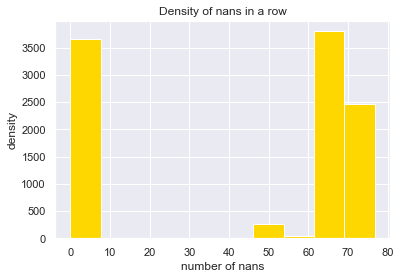

In [8]:
# полнота данных по клиентам

stats2 = pd.DataFrame(index=['0%', '1% - 25%', '25% - 50%', '50% - 75%', '75% - 99%', '100%'], columns=['# nan'])
size = df.shape[1]
nans = df.isna().sum(axis=1) / size * 100
stats2.loc['0%', '# nan'] = (nans == 0).sum()
stats2.loc['1% - 25%', '# nan'] = ((nans > 0) & (nans < 25)).sum()
stats2.loc['25% - 50%', '# nan'] = ((nans >= 25) & (nans < 50)).sum()
stats2.loc['50% - 75%', '# nan'] = ((nans >= 50) & (nans < 75)).sum()
stats2.loc['75% - 99%', '# nan'] = ((nans >= 75) & (nans <= 99)).sum()
stats2.loc['100%', '# nan'] = (nans == 100).sum()
display(stats2)
plt.hist(nans, color='gold')
plt.title('Density of nans in a row')
plt.xlabel('number of nans')
plt.ylabel('density')
plt.show()

Здесь видим, что существует немногим более половины объектов в базе данных, которые содержат более 50% пропущенных значений. В целом такая выборка выглядит не очень удачной для построения статистики. Удалим те две строки, в которых пропущено более 75% информации.

In [9]:
indexes = df[((nans >= 75) & (nans <= 99))].index
df.drop(index=indexes, inplace=True)

,nans,proportion
ID,0,0
INCOME_BASE_TYPE,77,0.75188
CREDIT_PURPOSE,0,0
INSURANCE_FLAG,1,0.00976467
DTI,133,1.2987
SEX,0,0
FULL_AGE_CHILD_NUMBER,0,0
DEPENDANT_NUMBER,0,0
EDUCATION,0,0
EMPL_TYPE,10,0.0976467


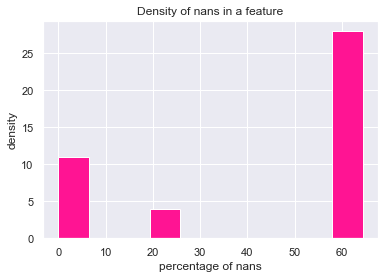

In [10]:
# пропущенные значения по признакам

stats3 = pd.DataFrame(columns=['nans', 'proportion'], index=df.columns)
size = df.shape[0]
for elem in df.columns:
    cnt = df[elem].isna().sum()
    stats3.loc[elem, 'nans'] = cnt
    stats3.loc[elem, 'proportion'] = cnt / size * 100
display(stats3)
plt.hist(stats3['proportion'], color='deeppink')
plt.title('Density of nans in a feature')
plt.xlabel('percentage of nans')
plt.ylabel('density')
plt.show()

В общем случае можно разделить процентный диапазон пропущенных значений на 3 категории: 
        - около 1%
        - около 22%
        - более 50%
Для каждого пункта проведем обработку. 

Обратим внимание на те признаки, в которых пропущено более 50% значений: это колонки от *EMPL_FORM* до *ninety_vintage*. В обычной жизни признаки с такой долей пропусков могут посчитаться бесполезными, но мы не будем разбрасываться данными, поэтому введём для них новое значение *unknown*, в случае категориального признака, заданного строкой, и *-1*, в случае категориального признака, заданного числом. В случае интервального будем заполнять пропуски методом линейной интерполяции.

In [11]:
feats_cat_str = ['EMPL_FORM', 'FAMILY_STATUS']
feats_cat_num = ['if_zalog', 'dlq_exist', 'thirty_in_a_year', 
             'sixty_in_a_year', 'ninety_in_a_year', 'thirty_vintage', 'sixty_vintage', 'ninety_vintage']
feats_num = ['max90days', 'max60days', 'max30days', 'max21days', 'max14days', 'avg_num_delay', 'num_AccountActive180', 
             'num_AccountActive90', 'num_AccountActive60', 'Active_to_All_prc', 'numAccountActiveAll', 'numAccountClosed',
             'sum_of_paym_months', 'all_credits', 'Active_not_cc', 'own_closed', 'min_MnthAfterLoan', 'max_MnthAfterLoan']
df[feats_cat_str] = df[feats_cat_str].fillna('unknown')
df[feats_cat_num] = df[feats_cat_num].fillna(-1)
df[feats_num] = df[feats_num].interpolate(method ='linear', limit_direction ='forward')

Для пропущенных значений в количестве около 1%, а также категориальным признакам, присвою самое часто встречаемое значение.

In [12]:
feats = ['INCOME_BASE_TYPE', 'INSURANCE_FLAG', 'DTI', 'EMPL_TYPE', 'EMPL_SIZE', 'EMPL_PROPERTY', 'BANKACCOUNT_FLAG']
df[feats] = df[feats].fillna(dict(zip(feats, *df[feats].mode().values)))

Для оставшихся средних пропущенных значений я введу замену пропуска на среднее значение.

In [13]:
feats = ['Period_at_work', 'age']
df[feats] = df[feats] .fillna(dict(zip(feats, df[feats].mean().values)))

###  Cреднее значение, медиана, стандартное отклонение, мин. и макс. у числовых признаков

In [14]:
funcs = ['mean', 'median', 'std', 'min', 'max']
stats4 = pd.DataFrame(index=funcs)
size = df.shape[0]
for elem in numeric:
    stats4.loc['mean', elem] = df[elem].mean()
    stats4.loc['median', elem] = df[elem].median() 
    stats4.loc['std', elem] = df[elem].std()
    stats4.loc['min', elem] = df[elem].min()
    stats4.loc['max', elem] = df[elem].max()
stats4.T

,mean,median,std,min,max
DTI,0.386738,0.400000,0.138781,0.01,0.59
FULL_AGE_CHILD_NUMBER,0.547115,0.000000,0.761598,0.00,9.00
DEPENDANT_NUMBER,0.004004,0.000000,0.075800,0.00,2.00
Period_at_work,66.580584,66.580584,58.384712,5.00,493.00
age,36.278473,36.278473,7.636131,23.00,63.00
max90days,1.623474,1.000000,1.593657,0.00,29.00
max60days,1.149595,1.000000,1.269655,0.00,24.00
max30days,0.853921,0.666667,1.076847,0.00,14.00
max21days,0.639781,0.333333,0.927663,0.00,13.00
max14days,0.528415,0.076923,0.812271,0.00,10.00


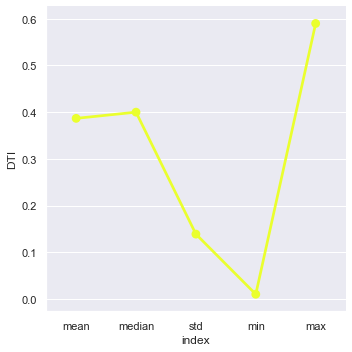

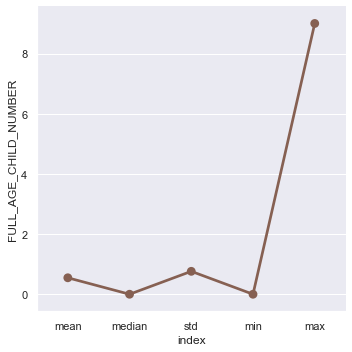

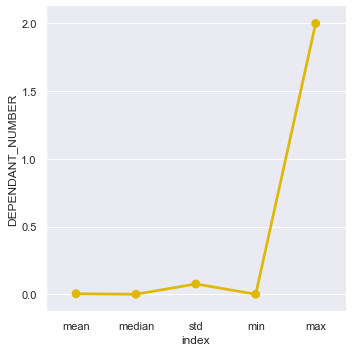

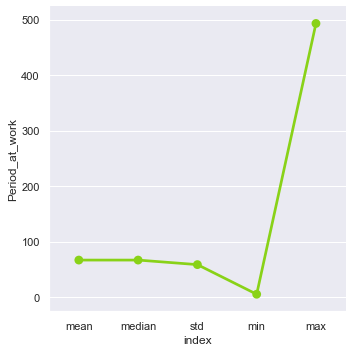

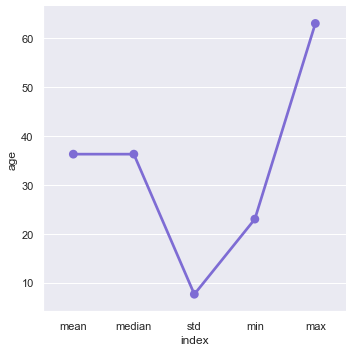

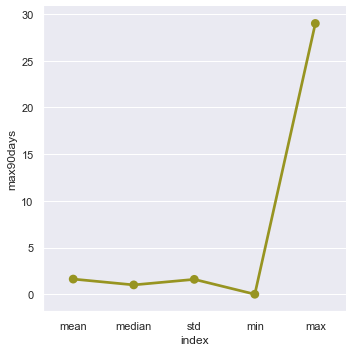

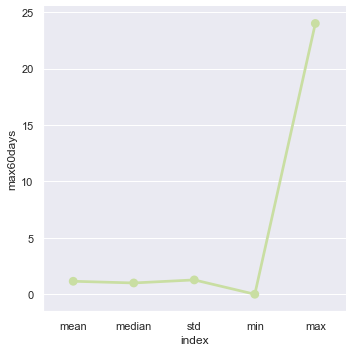

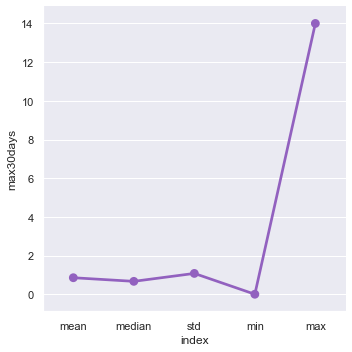

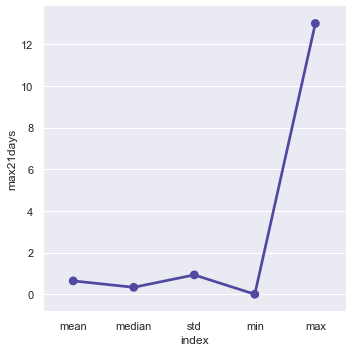

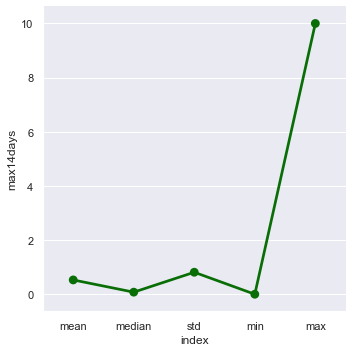

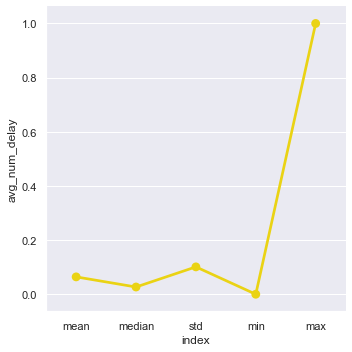

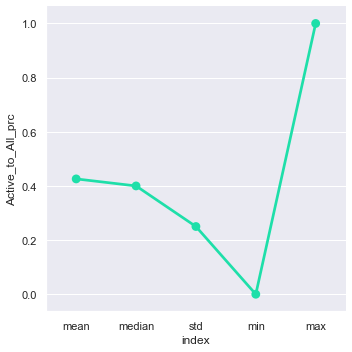

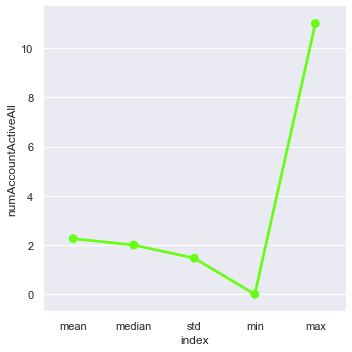

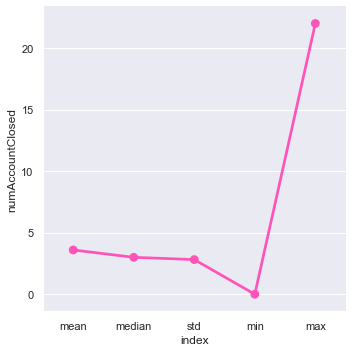

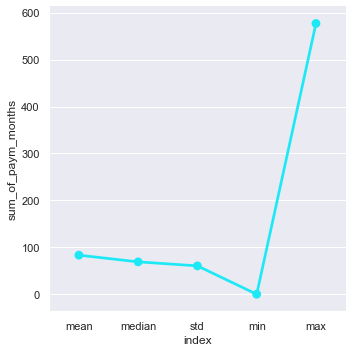

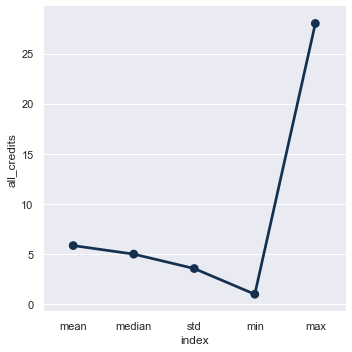

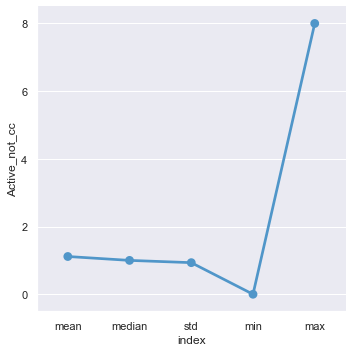

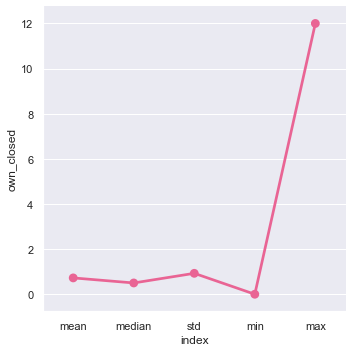

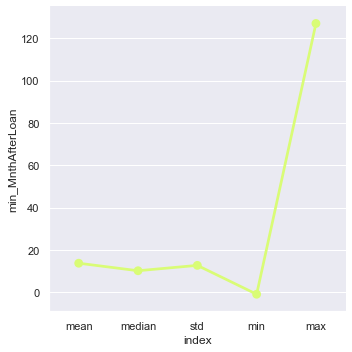

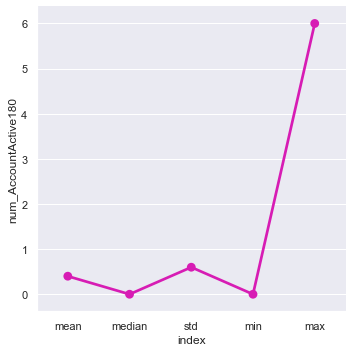

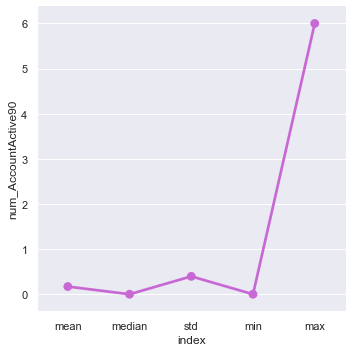

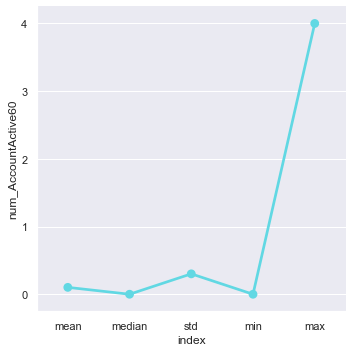

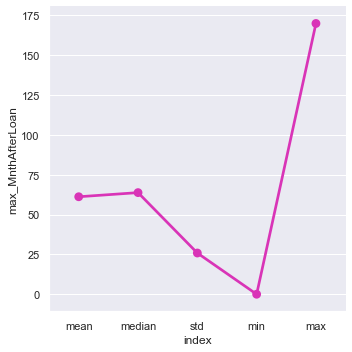

In [15]:
stats4.reset_index(inplace=True)
for col in stats4._get_numeric_data().columns:
    sns.factorplot(x="index", y=col, data=stats4, color=np.random.rand(3,))
    plt.show()

Здесь, глядя на значения параметров, отклонением является -1 в признаке *min_MnthAfterLoan*. Посмотрим, сколько таких объектов, если немного, то удалим, а если много, то заменим.

In [16]:
(df.min_MnthAfterLoan < 0).sum()

32

In [17]:
df.drop(df[df.min_MnthAfterLoan < 0].index, inplace=True)

### Уникальные значения

In [18]:
stats5 = pd.DataFrame(columns=['nunique', 'proportion'], index=df.columns)
size = df.shape[0]
for elem in df.columns:
    cnt = df[elem].nunique()
    stats5.loc[elem, 'nunique'] = cnt
    stats5.loc[elem, 'proportion'] = cnt / size * 100
display(stats5)

,nunique,proportion
ID,10209,100
INCOME_BASE_TYPE,4,0.0391811
CREDIT_PURPOSE,10,0.0979528
INSURANCE_FLAG,2,0.0195906
DTI,59,0.577921
SEX,2,0.0195906
FULL_AGE_CHILD_NUMBER,8,0.0783622
DEPENDANT_NUMBER,3,0.0293858
EDUCATION,9,0.0881575
EMPL_TYPE,9,0.0881575


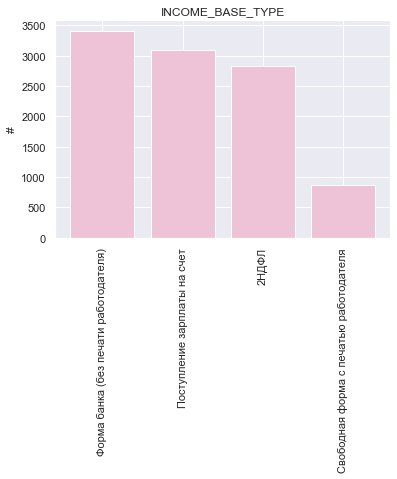

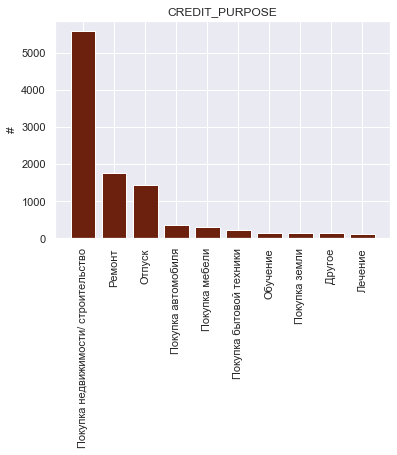

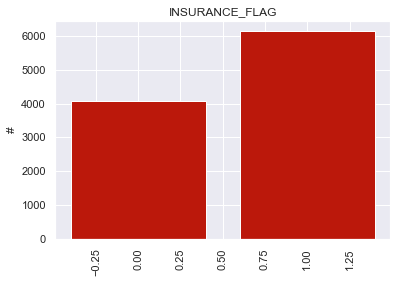

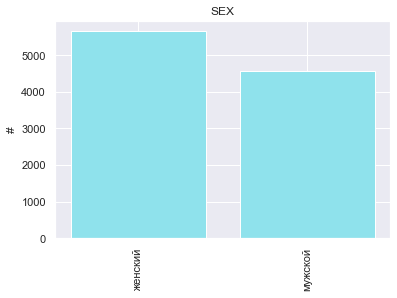

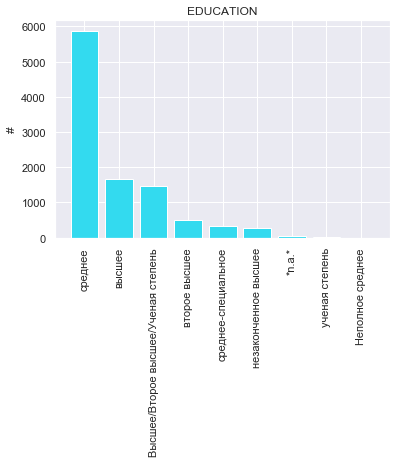

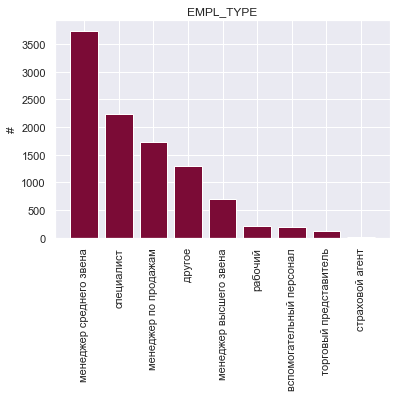

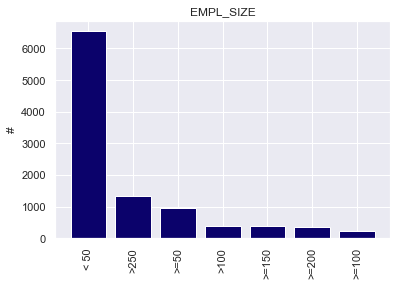

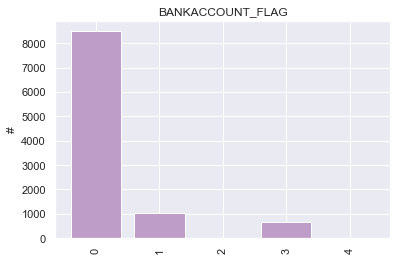

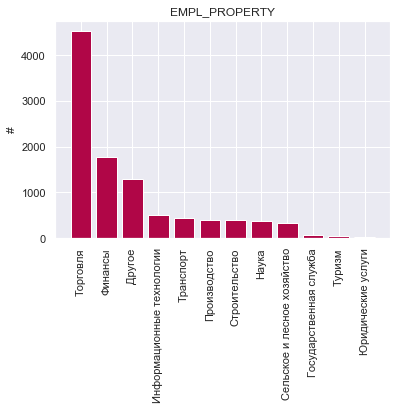

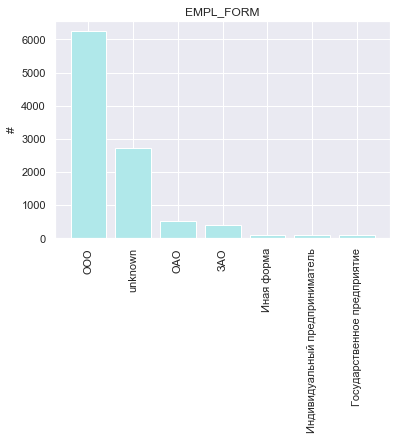

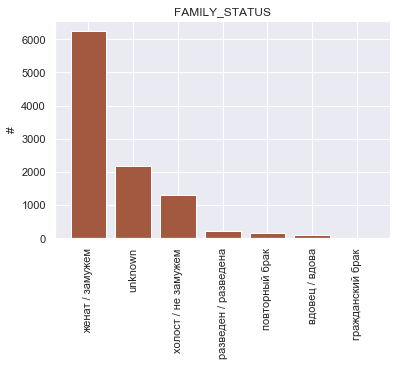

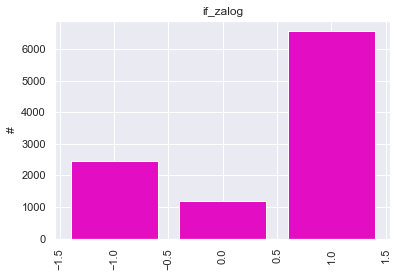

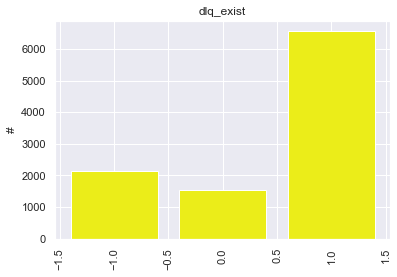

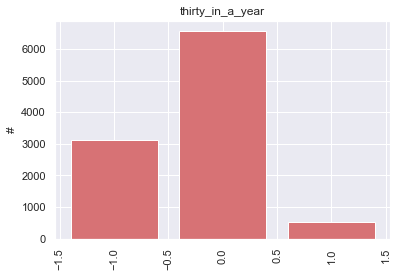

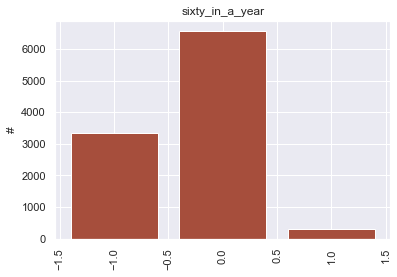

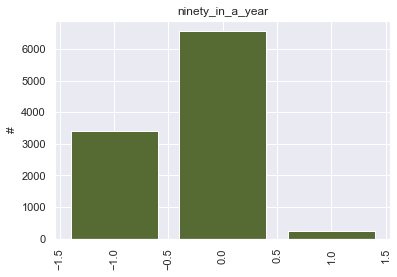

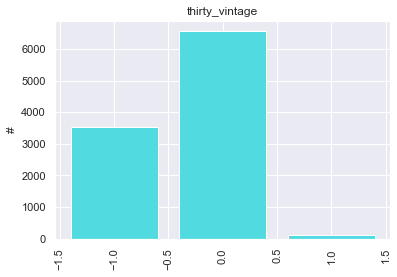

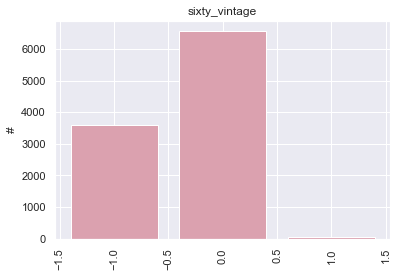

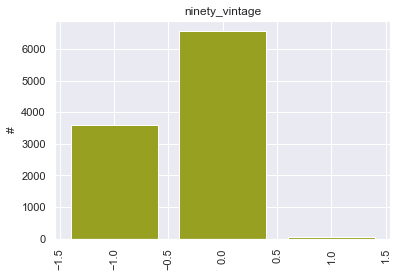

In [19]:
for feat in categorical:
    plt.bar(df[feat].unique(), df[feat].value_counts(), color=np.random.rand(3,))
    plt.title(feat)
    plt.xticks(rotation=90)
    plt.ylabel("#")
    plt.savefig('target.png')
    plt.show()

Рассмотрим, какие категории кажутся некорректными и обработаем их:

In [20]:
# В признаке EDUCATION значение *n.a.* переведем в установленный выше формат "unknown"

df['EDUCATION'].replace('*n.a.*', 'unknown', inplace=True)

### Посмотрим на распределение данных в зависимости от значений категориальных признаков

In [21]:
from scipy.stats import mode

for cat in categorical:
    columns = (categorical + numeric)
    columns.remove(cat)
    curr = df.groupby(cat)[[i for i in columns]].apply(lambda x: x.mode()).dropna().T
    for i in curr.index:
        if curr.loc[i].nunique() == 1:
            curr.drop(index=i, inplace=True)
    display(curr)

INCOME_BASE_TYPE,2НДФЛ,Поступление зарплаты на счет,Свободная форма с печатью работодателя,Форма банка (без печати работодателя)
,0,0,0,0
DTI,0.59,0.59,0.49,0.49
max60days,1,0,1,1
numAccountActiveAll,1,1,2,2
numAccountClosed,1,1,2,2
sum_of_paym_months,10,25,29,60
all_credits,5,3,3,5
Active_not_cc,1,0,1,1
min_MnthAfterLoan,2,5,3,5
max_MnthAfterLoan,74,71,83,89


CREDIT_PURPOSE,Другое,Лечение,Обучение,Отпуск,Покупка автомобиля,Покупка бытовой техники,Покупка земли,Покупка мебели,Покупка недвижимости/ строительство,Ремонт
,0,0,0,0,0,0,0,0,0,0
INCOME_BASE_TYPE,Поступление зарплаты на счет,Поступление зарплаты на счет,Поступление зарплаты на счет,Поступление зарплаты на счет,2НДФЛ,Поступление зарплаты на счет,2НДФЛ,Поступление зарплаты на счет,2НДФЛ,2НДФЛ
SEX,мужской,женский,женский,женский,мужской,мужской,мужской,мужской,мужской,мужской
DTI,0.59,0.59,0.49,0.59,0.49,0.59,0.59,0.59,0.59,0.59
max60days,0,1,1,0,1,0,0,0,1,1
Active_to_All_prc,0.5,0.5,0.5,0.5,0,0,0.5,0.5,0.5,0.5
numAccountActiveAll,2,2,1,1,1,1,1,2,2,2
numAccountClosed,1,2,3,2,1,2,0,1,2,2
sum_of_paym_months,89,11,6,47,32,14,20,61,38,47
all_credits,3,4,3,3,4,2,3,3,3,5


INSURANCE_FLAG,0.0,1.0
,0,0
sum_of_paym_months,40,25
all_credits,3,5
max_MnthAfterLoan,83,93


SEX,женский,мужской
,0,0
DTI,0.59,0.49
numAccountActiveAll,2,1
numAccountClosed,1,2
sum_of_paym_months,25,38
all_credits,4,3
min_MnthAfterLoan,3,5
max_MnthAfterLoan,93,83


EDUCATION,unknown,Высшее/Второе высшее/Ученая степень,Неполное среднее,второе высшее,высшее,незаконченное высшее,среднее,среднее-специальное,ученая степень
,0,0,0,0,0,0,0,0,0
INCOME_BASE_TYPE,Форма банка (без печати работодателя),Форма банка (без печати работодателя),2НДФЛ,2НДФЛ,2НДФЛ,Поступление зарплаты на счет,Поступление зарплаты на счет,2НДФЛ,2НДФЛ
CREDIT_PURPOSE,Ремонт,Ремонт,Покупка автомобиля,Ремонт,Ремонт,Ремонт,Ремонт,Ремонт,Ремонт
SEX,женский,мужской,мужской,мужской,мужской,мужской,мужской,мужской,мужской
EMPL_TYPE,вспомогательный персонал,специалист,рабочий,специалист,специалист,специалист,вспомогательный персонал,вспомогательный персонал,специалист
FAMILY_STATUS,unknown,unknown,женат / замужем,unknown,unknown,unknown,unknown,unknown,unknown
if_zalog,-1,-1,0,-1,-1,-1,-1,-1,-1
dlq_exist,-1,-1,1,-1,-1,-1,-1,-1,-1
thirty_in_a_year,-1,-1,0,-1,-1,-1,-1,-1,-1
sixty_in_a_year,-1,-1,0,-1,-1,-1,-1,-1,-1


EMPL_TYPE,вспомогательный персонал,другое,менеджер высшего звена,менеджер по продажам,менеджер среднего звена,рабочий,специалист,страховой агент,торговый представитель
,0,0,0,0,0,0,0,0,0
INCOME_BASE_TYPE,2НДФЛ,2НДФЛ,Форма банка (без печати работодателя),Поступление зарплаты на счет,2НДФЛ,2НДФЛ,Поступление зарплаты на счет,Поступление зарплаты на счет,Поступление зарплаты на счет
INSURANCE_FLAG,1,0,1,1,1,1,1,0,1
SEX,мужской,женский,мужской,мужской,мужской,мужской,женский,женский,мужской
EDUCATION,высшее,высшее,высшее,высшее,высшее,среднее-специальное,высшее,высшее,высшее
EMPL_SIZE,>250,>250,< 50,>250,>250,>250,>250,>250,>250
BANKACCOUNT_FLAG,0,1,0,0,0,0,0,0,0
EMPL_PROPERTY,Торговля,Финансы,Торговля,Торговля,Торговля,Производство,Торговля,Финансы,Торговля
DTI,0.49,0.59,0.49,0.49,0.59,0.49,0.59,0.17,0.49
Period_at_work,66.5806,6,66.5806,66.5806,66.5806,66.5806,66.5806,66.5806,66.5806


EMPL_SIZE,< 50,>100,>250,>=100,>=150,>=200,>=50
,0,0,0,0,0,0,0
INCOME_BASE_TYPE,Форма банка (без печати работодателя),Форма банка (без печати работодателя),Поступление зарплаты на счет,Форма банка (без печати работодателя),2НДФЛ,2НДФЛ,Форма банка (без печати работодателя)
SEX,мужской,мужской,мужской,женский,мужской,мужской,мужской
EDUCATION,высшее,высшее,высшее,Высшее/Второе высшее/Ученая степень,высшее,высшее,высшее
EMPL_PROPERTY,Торговля,Торговля,Производство,Торговля,Торговля,Торговля,Торговля
EMPL_FORM,ООО,unknown,unknown,unknown,unknown,unknown,unknown
FAMILY_STATUS,женат / замужем,unknown,unknown,unknown,unknown,unknown,unknown
thirty_in_a_year,0,-1,-1,-1,-1,-1,-1
sixty_in_a_year,0,-1,-1,-1,-1,-1,-1
ninety_in_a_year,0,-1,-1,-1,-1,-1,-1


BANKACCOUNT_FLAG,0.0,1.0,2.0,3.0,4.0
,0,0,0,0,0
INCOME_BASE_TYPE,Форма банка (без печати работодателя),Поступление зарплаты на счет,2НДФЛ,2НДФЛ,2НДФЛ
CREDIT_PURPOSE,Ремонт,Ремонт,Ремонт,Ремонт,Покупка автомобиля
INSURANCE_FLAG,1,1,1,1,0
EMPL_TYPE,специалист,специалист,рабочий,специалист,вспомогательный персонал
EMPL_SIZE,>250,>250,< 50,>250,>250
EMPL_PROPERTY,Торговля,Производство,Строительство,Производство,Другое
EMPL_FORM,unknown,unknown,unknown,unknown,ООО
FAMILY_STATUS,unknown,unknown,unknown,unknown,женат / замужем
thirty_in_a_year,-1,-1,-1,-1,0


EMPL_PROPERTY,Государственная служба,Другое,Информационные технологии,Наука,Производство,Сельское и лесное хозяйство,Строительство,Торговля,Транспорт,Туризм,Финансы,Юридические услуги
,0,0,0,0,0,0,0,0,0,0,0,0
INCOME_BASE_TYPE,2НДФЛ,Поступление зарплаты на счет,Поступление зарплаты на счет,Форма банка (без печати работодателя),Поступление зарплаты на счет,2НДФЛ,Форма банка (без печати работодателя),Форма банка (без печати работодателя),2НДФЛ,Форма банка (без печати работодателя),2НДФЛ,Форма банка (без печати работодателя)
INSURANCE_FLAG,1,1,1,1,1,1,1,1,1,1,0,0
SEX,мужской,мужской,мужской,женский,мужской,мужской,мужской,мужской,мужской,женский,женский,мужской
EMPL_TYPE,специалист,специалист,специалист,специалист,специалист,специалист,менеджер среднего звена,специалист,вспомогательный персонал,специалист,специалист,специалист
EMPL_SIZE,>250,>250,>250,>250,>250,>250,>250,>250,>250,< 50,>250,< 50
EMPL_FORM,unknown,ООО,ООО,unknown,unknown,ООО,unknown,unknown,unknown,unknown,unknown,ООО
FAMILY_STATUS,unknown,женат / замужем,женат / замужем,unknown,unknown,женат / замужем,unknown,unknown,unknown,unknown,unknown,женат / замужем
if_zalog,-1,0,0,-1,-1,0,-1,-1,-1,-1,-1,0
dlq_exist,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1


EMPL_FORM,unknown,Государственное предприятие,ЗАО,Иная форма,Индивидуальный предприниматель,ОАО,ООО
,0,0,0,0,0,0,0
INCOME_BASE_TYPE,2НДФЛ,2НДФЛ,Поступление зарплаты на счет,Форма банка (без печати работодателя),Форма банка (без печати работодателя),Поступление зарплаты на счет,Поступление зарплаты на счет
SEX,мужской,женский,женский,мужской,мужской,мужской,мужской
EDUCATION,высшее,высшее,высшее,высшее,Высшее/Второе высшее/Ученая степень,высшее,высшее
EMPL_SIZE,>250,>250,>250,>250,< 50,>250,>250
EMPL_PROPERTY,Торговля,Другое,Торговля,Другое,Торговля,Другое,Торговля
FAMILY_STATUS,unknown,женат / замужем,женат / замужем,женат / замужем,женат / замужем,женат / замужем,женат / замужем
if_zalog,-1,0,0,0,0,0,0
dlq_exist,-1,1,1,1,1,1,1
thirty_in_a_year,-1,0,0,0,0,0,0


FAMILY_STATUS,unknown,вдовец / вдова,гражданский брак,женат / замужем,повторный брак,разведен / разведена,холост / не замужем
,0,0,0,0,0,0,0
INCOME_BASE_TYPE,2НДФЛ,2НДФЛ,Поступление зарплаты на счет,Поступление зарплаты на счет,2НДФЛ,Поступление зарплаты на счет,Поступление зарплаты на счет
CREDIT_PURPOSE,Ремонт,Отпуск,Ремонт,Ремонт,Ремонт,Ремонт,Ремонт
SEX,мужской,женский,женский,мужской,мужской,женский,женский
EMPL_TYPE,специалист,менеджер среднего звена,специалист,специалист,специалист,специалист,специалист
EMPL_PROPERTY,Торговля,Другое,Торговля,Торговля,Торговля,Торговля,Торговля
EMPL_FORM,unknown,ООО,ООО,ООО,ООО,ООО,ООО
if_zalog,-1,1,0,0,0,0,0
dlq_exist,-1,1,1,1,1,1,1
thirty_in_a_year,-1,0,0,0,0,0,0


if_zalog,-1.0,0.0,1.0
,0,0,0
INCOME_BASE_TYPE,2НДФЛ,Поступление зарплаты на счет,Форма банка (без печати работодателя)
SEX,мужской,женский,мужской
EMPL_FORM,unknown,ООО,ООО
FAMILY_STATUS,unknown,женат / замужем,женат / замужем
dlq_exist,-1,1,1
thirty_in_a_year,-1,0,0
sixty_in_a_year,-1,0,0
ninety_in_a_year,-1,0,0
thirty_vintage,-1,0,0


dlq_exist,-1.0,0.0,1.0
,0,0,0
INCOME_BASE_TYPE,2НДФЛ,Поступление зарплаты на счет,Поступление зарплаты на счет
EMPL_FORM,unknown,ООО,ООО
FAMILY_STATUS,unknown,женат / замужем,женат / замужем
if_zalog,-1,0,0
thirty_in_a_year,-1,0,0
sixty_in_a_year,-1,0,0
ninety_in_a_year,-1,0,0
thirty_vintage,-1,0,0
sixty_vintage,-1,0,0


thirty_in_a_year,-1.0,0.0,1.0
,0,0,0
INCOME_BASE_TYPE,2НДФЛ,Поступление зарплаты на счет,Поступление зарплаты на счет
EMPL_FORM,unknown,ООО,ООО
FAMILY_STATUS,unknown,женат / замужем,женат / замужем
if_zalog,-1,0,0
dlq_exist,-1,1,1
sixty_in_a_year,-1,0,1
ninety_in_a_year,-1,0,0
thirty_vintage,-1,0,0
sixty_vintage,-1,0,0


sixty_in_a_year,-1.0,0.0,1.0
,0,0,0
INCOME_BASE_TYPE,2НДФЛ,Поступление зарплаты на счет,Поступление зарплаты на счет
EMPL_FORM,unknown,ООО,ООО
FAMILY_STATUS,unknown,женат / замужем,женат / замужем
if_zalog,-1,0,0
dlq_exist,-1,1,1
thirty_in_a_year,-1,0,1
ninety_in_a_year,-1,0,1
thirty_vintage,-1,0,0
sixty_vintage,-1,0,0


ninety_in_a_year,-1.0,0.0,1.0
,0,0,0
INCOME_BASE_TYPE,2НДФЛ,Поступление зарплаты на счет,Поступление зарплаты на счет
EMPL_FORM,unknown,ООО,ООО
FAMILY_STATUS,unknown,женат / замужем,женат / замужем
if_zalog,-1,0,0
dlq_exist,-1,1,1
thirty_in_a_year,-1,0,1
sixty_in_a_year,-1,0,1
thirty_vintage,-1,0,0
sixty_vintage,-1,0,0


thirty_vintage,-1.0,0.0,1.0
,0,0,0
INCOME_BASE_TYPE,2НДФЛ,Поступление зарплаты на счет,Поступление зарплаты на счет
EMPL_FORM,unknown,ООО,ООО
FAMILY_STATUS,unknown,женат / замужем,женат / замужем
if_zalog,-1,0,0
dlq_exist,-1,1,1
thirty_in_a_year,-1,0,1
sixty_in_a_year,-1,0,1
ninety_in_a_year,-1,0,0
sixty_vintage,-1,0,0


sixty_vintage,-1.0,0.0,1.0
,0,0,0
INCOME_BASE_TYPE,2НДФЛ,Поступление зарплаты на счет,Поступление зарплаты на счет
EMPL_FORM,unknown,ООО,ООО
FAMILY_STATUS,unknown,женат / замужем,женат / замужем
if_zalog,-1,0,0
dlq_exist,-1,1,1
thirty_in_a_year,-1,0,1
sixty_in_a_year,-1,0,1
ninety_in_a_year,-1,0,1
thirty_vintage,-1,0,1


ninety_vintage,-1.0,0.0,1.0
,0,0,0
INCOME_BASE_TYPE,2НДФЛ,Поступление зарплаты на счет,Поступление зарплаты на счет
EMPL_TYPE,специалист,специалист,вспомогательный персонал
EMPL_FORM,unknown,ООО,ООО
FAMILY_STATUS,unknown,женат / замужем,женат / замужем
if_zalog,-1,0,0
dlq_exist,-1,1,1
thirty_in_a_year,-1,0,1
sixty_in_a_year,-1,0,1
ninety_in_a_year,-1,0,1


Среди данных таблиц можно найти интересные закономерности для анализа. Перечислю некоторые из них (информация представлена через аггрегирующую фукцию mode, то есть далее речь о большинстве, а не о всех представителях): 
    - Не обращались в бюро кредитных историй за поледние 60 дней, а также не имеют кредитных счетов, кроме карт, люди, чье подтверждение дохода -- поступление зарплаты на счёт;
    - Женщины берут кредиты на лечение, обучение и отпуск; 
    - На обучение больше закрытых счетов, чем на остальное, а на покупку земли еще ни один счет не закрыт;
    - На покупку автомобиля чаще всего берут кредит люди с неполным средним образованием, в то время как остальные интересуются ремонтом;
    - У рабочего средне-специальное образование (что логично);
    - Женщины получают зарплату не менее 100;
    - Люди с зарплатой более 250 занимаются производством.

# Часть 2

В качестве методов сегментации я использую обучение без учителя на основе алгоритмов машинного обучения: KMeans и MeanShift. Такой подход математически обоснованно обеспечивает грамотное разбиение на классы. Я выбрала именно эти методы, так как уже имела опыт работы с различными алгоритмами кластеризации и знаю, что они хорошо сработают на выборке такого размера. Далее более подробный анализ выбранных алгоритмов и результатов.

## Предобработка

### Закодирую категориальные признаки методом OneHotEncoder, нормализую интервальные признаки

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

df_tr = column_transformer.fit_transform(df[[*numeric, *categorical]])
display(df_tr)

array([[ 0.        ,  0.        ,  0.        , ..., -0.42931503,
        -0.33729531,  0.10943291],
       [ 0.        ,  1.        ,  0.        , ..., -0.42931503,
        -0.33729531,  0.34123116],
       [ 0.        ,  1.        ,  0.        , ..., -0.42931503,
        -0.33729531,  0.57302941],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.42931503,
        -0.33729531, -0.62459488],
       [ 0.        ,  0.        ,  1.        , ..., -0.42931503,
        -0.33729531, -0.70186096],
       [ 0.        ,  0.        ,  0.        , ..., -0.42931503,
        -0.33729531, -0.70186096]])

После масштабирования данных можно корректно оценить корреляцию признаков между собой.

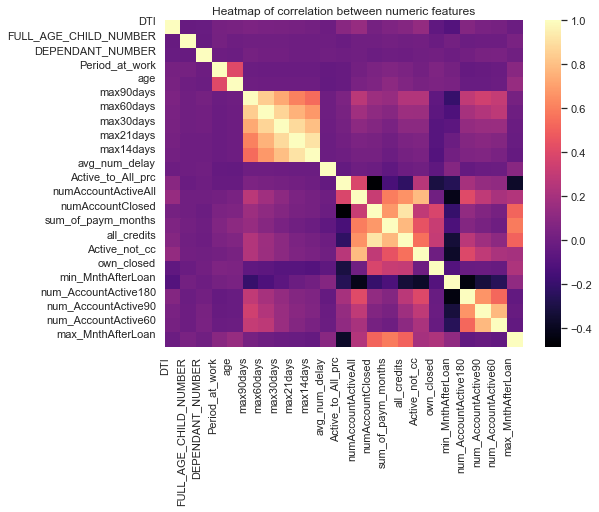

In [22]:
scale = StandardScaler().fit_transform(df[numeric])
df_sc = pd.DataFrame(columns=numeric)
for f in range(len(numeric)):
    df_sc[numeric[f]] = pd.Series(scale[:, f])
cor = df_sc.corr()
plot = sns.heatmap(cor, cmap='magma')
plot.figure.set_size_inches(8, 6)
plt.title('Heatmap of correlation between numeric features')
plt.xticks(np.arange(len(numeric)), labels=numeric)
plt.yticks(np.arange(len(numeric)), labels=numeric)
plt.show()

Среди зависимостей можно выделить:
    - различное количество запросов в бюро кредитных историй между собой; 
    - возраст и время работы;
    - информация о считах между различными параметрами.

### Уменьшy размерность методом PCA

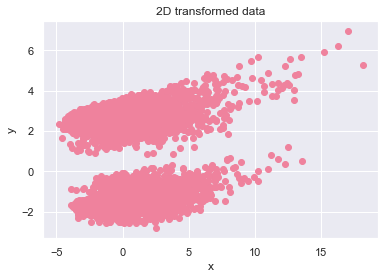

In [23]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2).fit(df_tr)
pca_2d = pca.transform(df_tr)

# нарисуем, как сейчас выглядят отмасштабированные данные
plt.scatter(pca_2d[:,0], pca_2d[:, 1], color=np.random.rand(3,))
plt.title('2D transformed data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Несмотря на то, что у нас здесь отчётливо выделяется 2 набора объектов примерно равного объёма, было бы интересно разделить эти массивы на более мелкие кластеры, чтобы было понятнее и проще анализировать заивисмости внутри признаков.

## Cегментация

### KMeans

**Немного теории:** Этот алгоритм хорошо подходит для потенциально не слишком большого числа кластеров, быстро работает, минимизируя сумму квадратов расстояния внутри кластера. Также алгоритм старается оптимизировать объем кластера так, чтобы элементов в каждом сегменте примерно равное количество. 

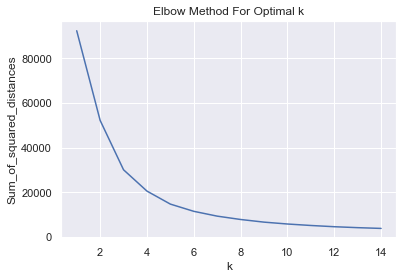

In [24]:
from sklearn.cluster import KMeans


# для начала определим оптимальное число кластеров методом Elbow method
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_2d)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [25]:
# судя по выраженному сгибу, подходящее число кластеров -- 4
np.random.seed(42)

kmeans = KMeans(n_clusters=4, random_state=16)
y = kmeans.fit_predict(pca_2d)
df['predict_cluster'] = y
df_sc['predict_cluster'] = y

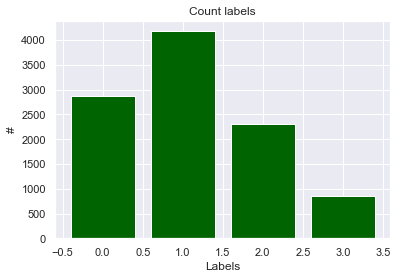

In [26]:
# какие значения кластеров вернул MeanShift и по сколько

labels = df['predict_cluster'].unique()
cnt = df['predict_cluster'].value_counts()
plt.bar(labels, cnt, color='darkgreen')
plt.title("Count labels")
plt.xlabel("Labels")
plt.ylabel("#")
plt.savefig('l.png')
plt.show()

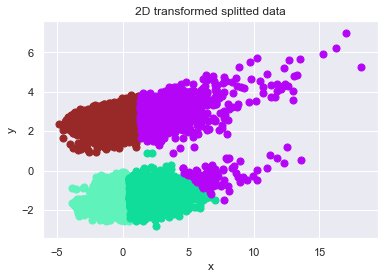

In [27]:
# раскрасим объекты на первоначальном графике в цвета кластеров

colors = np.random.rand(4, 3)
plt.scatter(pca_2d[y ==0,0], pca_2d[y == 0,1], s=50, color=colors[0])
plt.scatter(pca_2d[y ==1,0], pca_2d[y == 1,1], s=50, color=colors[1])
plt.scatter(pca_2d[y ==2,0], pca_2d[y == 2,1], s=50, color=colors[2])
plt.scatter(pca_2d[y ==3,0], pca_2d[y == 3,1], s=50, color=colors[3])
plt.title('2D transformed splitted data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Посмотрим на распределение отнормированных числовых переменных.

predict_cluster,0,1,2,3
DTI,-0.039877,-0.074252,0.043995,0.329306
FULL_AGE_CHILD_NUMBER,0.021751,-0.032297,-0.019721,0.056097
DEPENDANT_NUMBER,-0.018221,0.029398,-0.001402,-0.006301
Period_at_work,0.092291,-0.183288,0.101794,-0.108333
age,0.035682,-0.105298,0.044053,0.062348
max90days,-0.368460,-0.347813,0.526190,1.568618
max60days,-0.330332,-0.346616,0.485077,1.488302
max30days,-0.304284,-0.321619,0.459396,1.344757
max21days,-0.255438,-0.297888,0.412712,1.150203
max14days,-0.220197,-0.285007,0.383878,1.011083


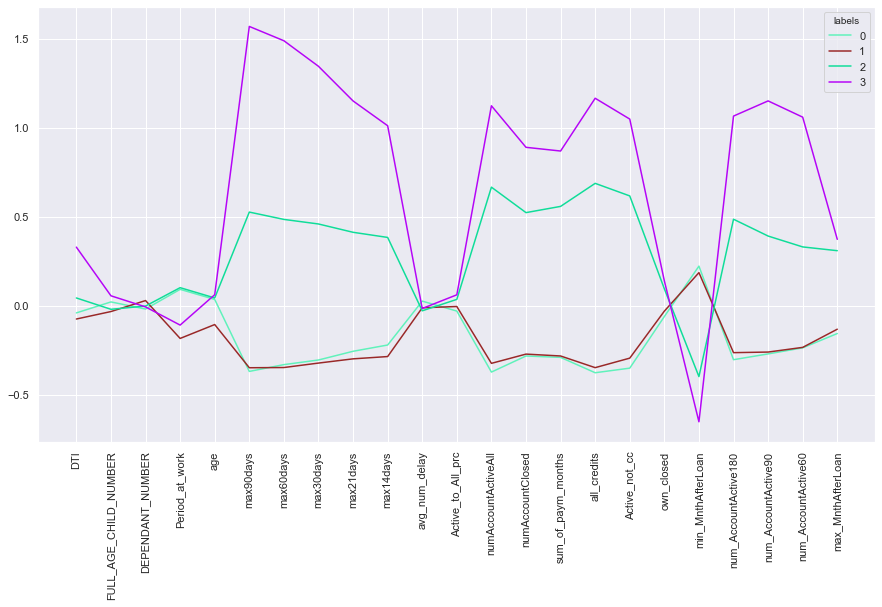

In [28]:
summary = df_sc.groupby(by='predict_cluster').mean()
display(summary.T)
plt.figure(figsize=(15, 8))
for i in summary.index:
    plt.plot(summary.iloc[i], data=summary, color=colors[i], label=i)
    plt.xticks(rotation=90)
plt.legend(title='labels')
plt.show()

Заметим, здесь выделяющимися признаками являются: *DTI*, *Period_at_work*, *age*, *max90days*, *numAccountActiveAll*, *sum_of_paym_months*, *all_credits*, *min_MnthAfterLoan*. Рассмотрим их более подробно.

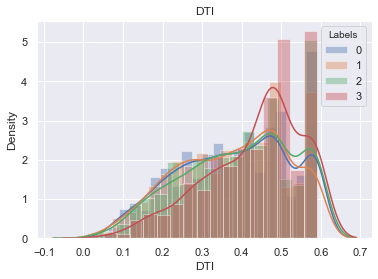

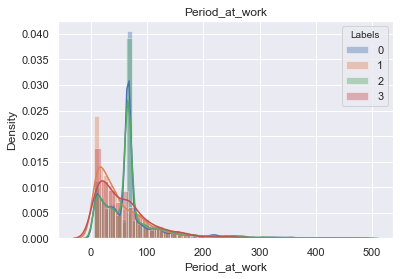

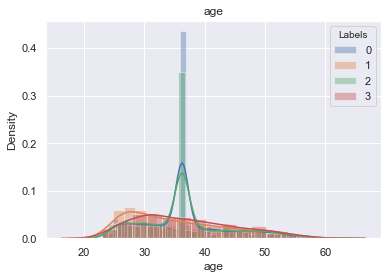

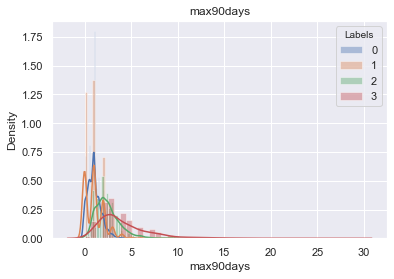

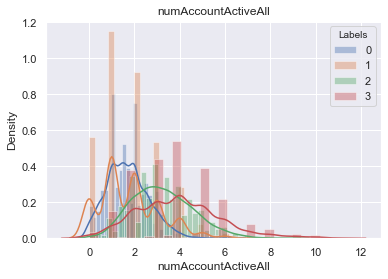

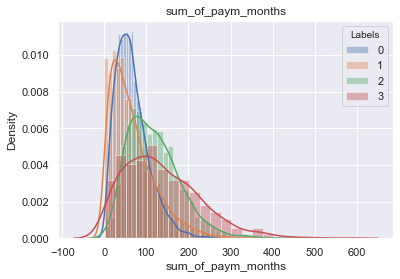

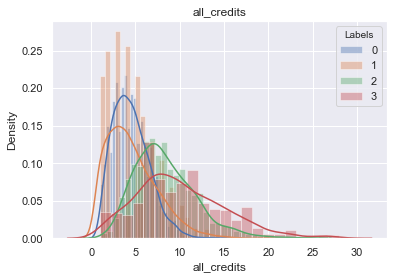

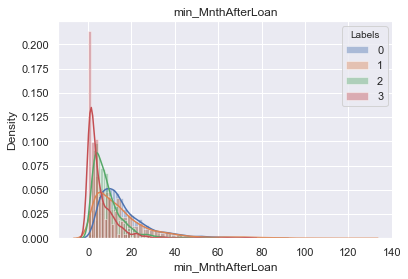

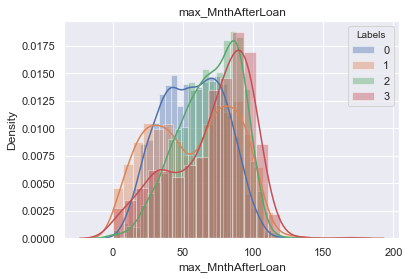

In [29]:
features = ['DTI', 'Period_at_work', 'age', 'max90days', 'numAccountActiveAll', 'sum_of_paym_months', 'all_credits',
            'min_MnthAfterLoan', 'max_MnthAfterLoan']
for feat in features:
    for i in summary.index:
        sns.distplot(df.loc[df.predict_cluster == i, feat], label=i)
        plt.ylabel("Density")
        plt.title(feat)
    plt.legend(title='Labels')
    plt.show()

**Относительно числовых признаков можем сделать следующие выводы:**
    - больше всего значения разнятся в признаках  'DTI', 'Period_at_work', 'age', 'max90days', 'numAccountActiveAll', 'sum_of_paym_months', 'all_credits', 'min_MnthAfterLoan';
    - Для кластера 0 характерно: времени за работой -- около 80, возраст примерно 36 лет, 2 открытых счёта, 50 -- сумма платежей за месяц, 5 кредитов;
    - Для кластера 1: немного времени за работой, около 0 запросов в бюро кредитных историй, 20 -- сумма платежей за последний месяц, 5 кредитов;
    - Для кластера 2: показатели напоминают показатели нулевого кластера, но сумма платежей за последний месяц больше, как и число кредитов, и число месяцев с последнего кредита;
    - Для кластера 3: высокое отношение DTI, мало времени за работой, около 3 запросов в бюро кредитных историй, 7 кредитов, частое взятие кредитов.

#### Посмотрим на распределение катеориальных переменных.

In [30]:
curr = df.groupby('predict_cluster')[[i for i in categorical]].apply(lambda x: x.mode()).dropna().T
for i in curr.index:
    if curr.loc[i].nunique() == 1:
        curr.drop(index=i, inplace=True)
display(curr)

predict_cluster,0,1,2,3
,0,0,0,0
INCOME_BASE_TYPE,2НДФЛ,Поступление зарплаты на счет,2НДФЛ,2НДФЛ
EMPL_FORM,unknown,ООО,unknown,ООО
FAMILY_STATUS,unknown,женат / замужем,unknown,женат / замужем
if_zalog,-1,0,-1,0
dlq_exist,-1,1,-1,1
thirty_in_a_year,-1,0,-1,0
sixty_in_a_year,-1,0,-1,0
ninety_in_a_year,-1,0,-1,0
thirty_vintage,-1,0,-1,0


В данном случае самыми показательными являются признаки 'INCOME_BASE_TYPE', 'EMPL_FORM', 'FAMILY_STATUS', 'if_zalog',
       'dlq_exist', 'thirty_in_a_year', 'ninety_vintage'. Рассмотрим их подробнее.

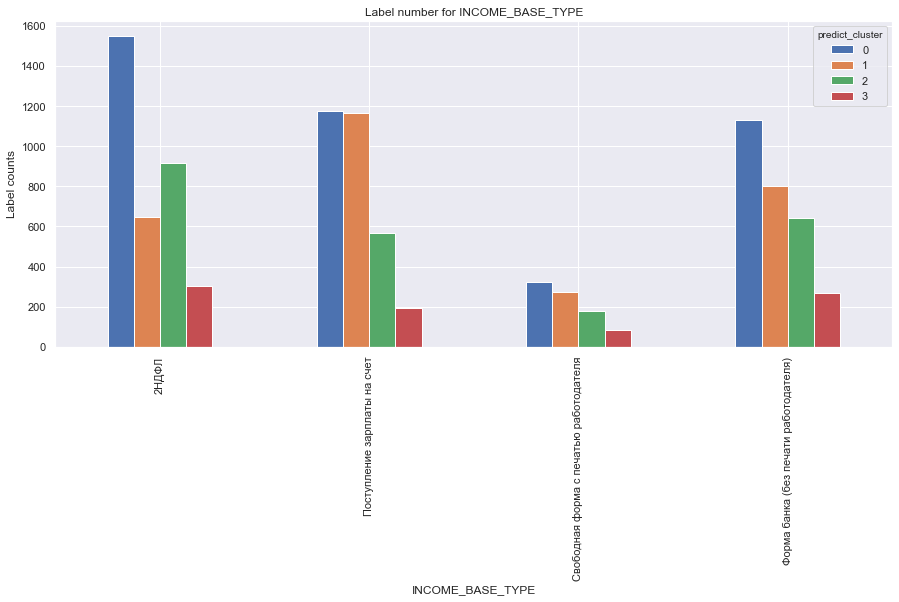

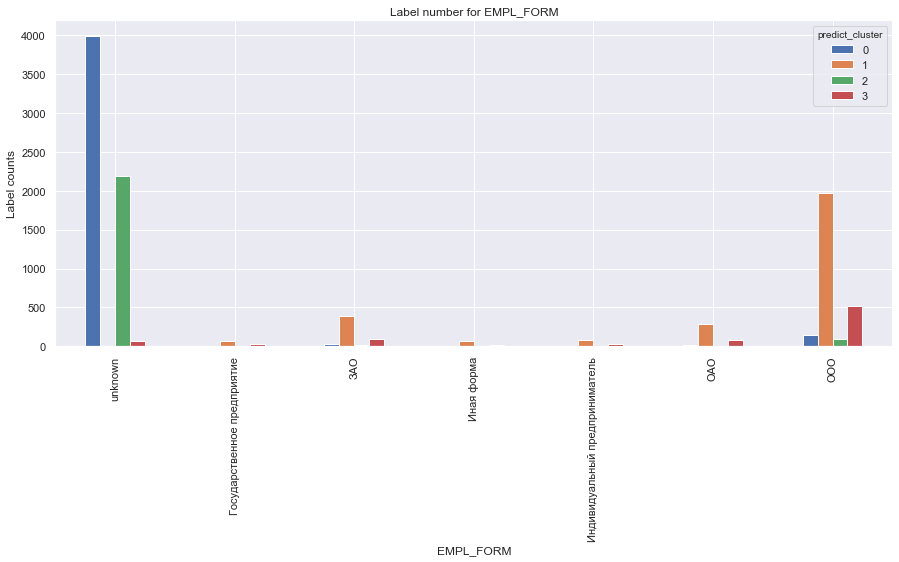

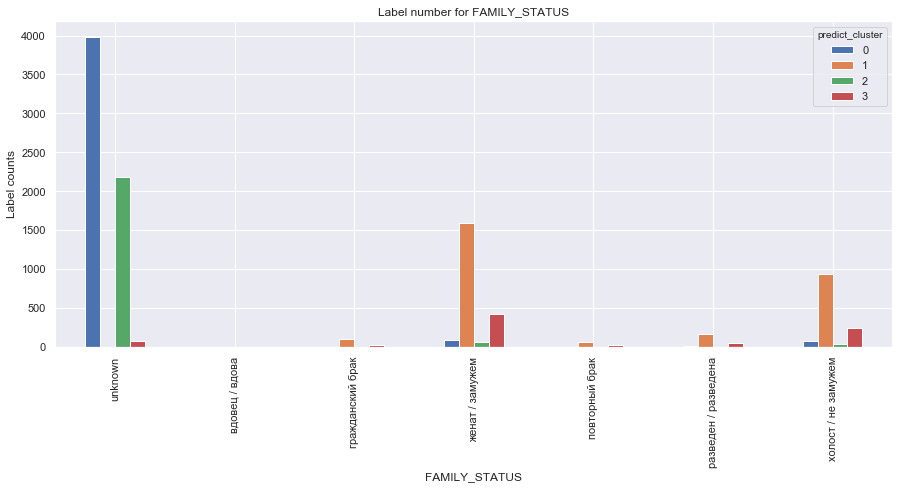

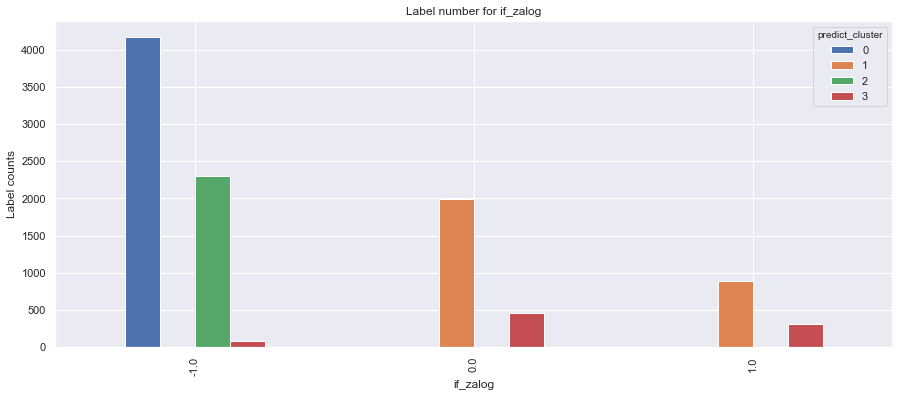

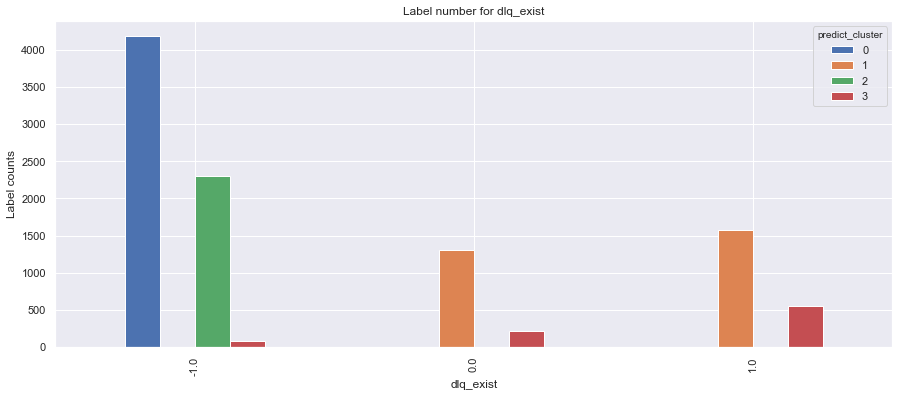

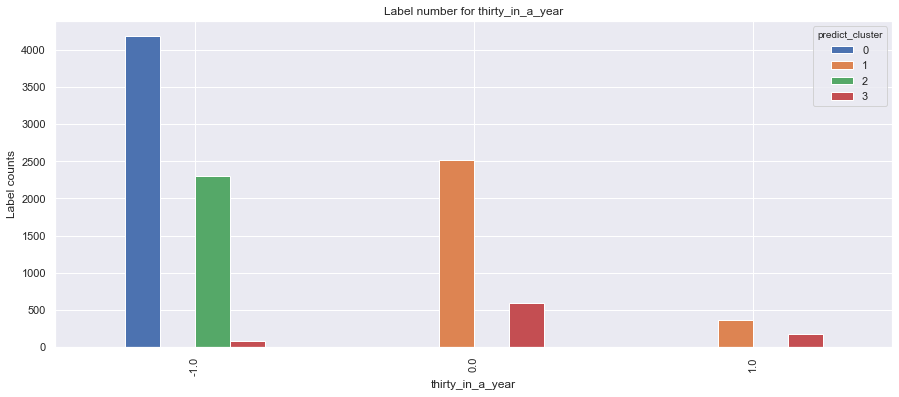

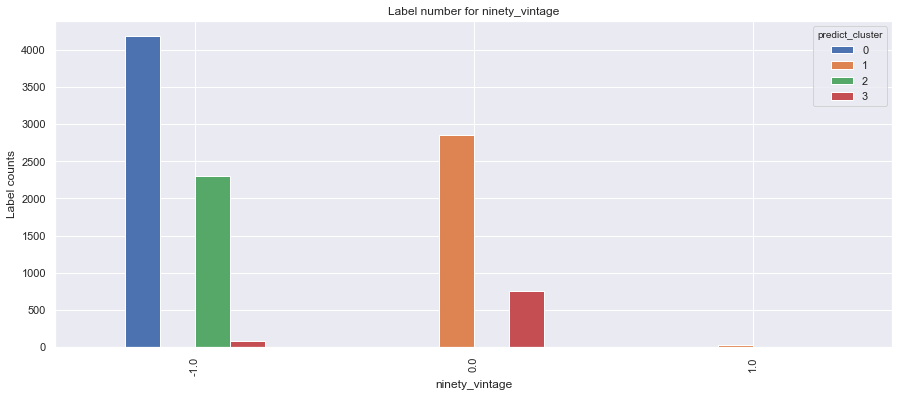

In [31]:
features = ['INCOME_BASE_TYPE', 'EMPL_FORM', 'FAMILY_STATUS', 'if_zalog', 'dlq_exist', 'thirty_in_a_year', 'ninety_vintage']
for cat in features:
    pd.crosstab(df[cat], df['predict_cluster']).plot(kind='bar', figsize=(15, 6))
    plt.title('Label number for ' + cat)
    plt.xlabel(cat)
    plt.ylabel('Label counts')
    plt.show()

**Относительно категориальных признаков можем сделать следующие выводы:**

    - больше всего значения разнятся в признаках  'INCOME_BASE_TYPE', 'EMPL_FORM', 'FAMILY_STATUS', 'if_zalog', 'dlq_exist', 'thirty_in_a_year', 'sixty_in_a_year', 'ninety_in_a_year', 'thirty_vintage', 'sixty_vintage', 'ninety_vintage';
    - Для кластера 0 характерно: большое число пропущенных значений, подтверждение дохода через 2НДФЛ;
    - Для кластера 1: подтверждение дохода за счёт Поступления зарплаты на счёт, организационно-правовая форма ООО, сеемйное положение женат/замужем, отсутсвие залога, маленькое количество просрочек;
    - Для кластера 2: так же, как у 0 большое число неизвестной информации;
    - Для кластера 3: организационно-правовая форма ООО, наличие просрочки на данный момент.

#### Из перечисленных выше особенностей нетрудно сформировать структурный портрет каждого кластера: просто объеднив описания числовых и категориальных признаков вместе.
В общем виде, кластер 1 -- самый большой, а 3 -- самый маленький.

### MeanShift

**Немного теории:** Этот алгоритм хорошо подходит для потенциально большого числа кластеров работает, минимизируя дистанцию между точками и обновляя значения центроидов. Размеры кластеров получаются неравномерные.

In [32]:
from sklearn.cluster import MeanShift


model = MeanShift()
y = model.fit_predict(pca_2d)
df['predict_cluster'] = y
df_sc['predict_cluster'] = y

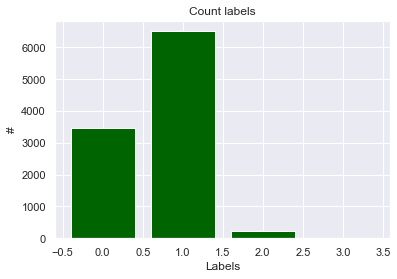

In [33]:
# какие значения кластеров вернул MeanShift и по сколько

labels = df['predict_cluster'].unique()
cnt = df['predict_cluster'].value_counts()
plt.bar(labels, cnt, color='darkgreen')
plt.title("Count labels")
plt.xlabel("Labels")
plt.ylabel("#")
plt.savefig('l.png')
plt.show()

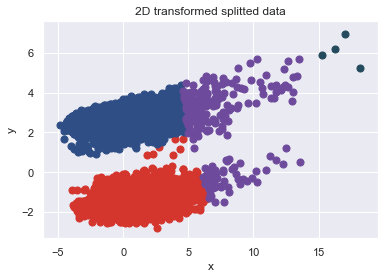

In [34]:
# раскрасим объекты на первоначальном графике в цвета кластеров

colors = np.random.rand(4, 3)
plt.scatter(pca_2d[y ==0,0], pca_2d[y == 0,1], s=50, color=colors[0])
plt.scatter(pca_2d[y ==1,0], pca_2d[y == 1,1], s=50, color=colors[1])
plt.scatter(pca_2d[y ==2,0], pca_2d[y == 2,1], s=50, color=colors[2])
plt.scatter(pca_2d[y ==3,0], pca_2d[y == 3,1], s=50, color=colors[3])
plt.title('2D transformed splitted data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Посмотрим на распределение отнормированных числовых переменных.

predict_cluster,0,1,2,3
DTI,-0.009902,-0.007853,0.388454,0.779316
FULL_AGE_CHILD_NUMBER,0.007008,-0.015369,0.023280,0.592971
DEPENDANT_NUMBER,-0.010403,0.015468,0.062647,-0.052902
Period_at_work,0.094880,-0.170981,-0.097716,-0.583907
age,0.039578,-0.081269,0.111515,-0.298812
max90days,-0.041254,-0.134339,3.051547,9.663716
max60days,-0.033391,-0.151128,3.063709,10.732347
max30days,-0.025362,-0.149452,2.827598,9.672821
max21days,-0.011137,-0.158006,2.581949,7.942022
max14days,0.001771,-0.156139,2.195578,7.343207


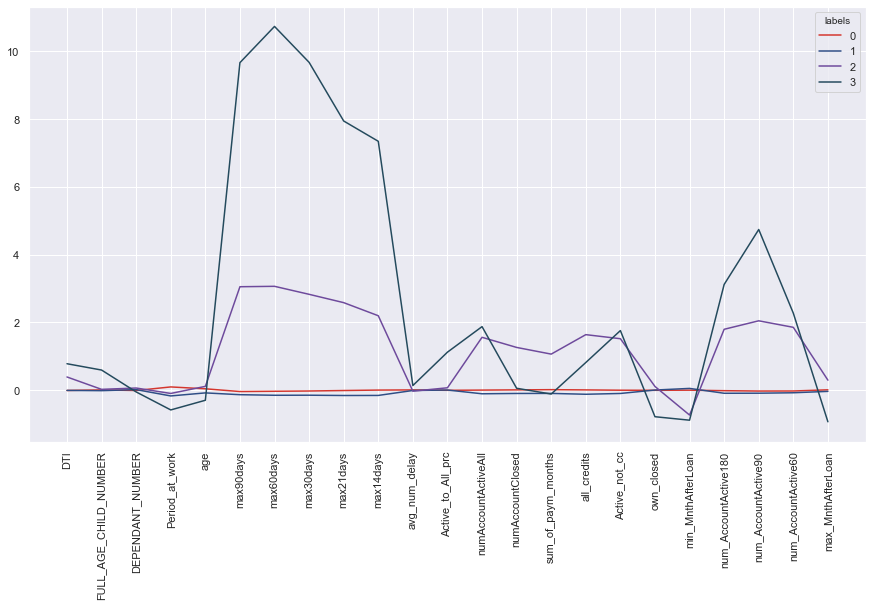

In [35]:
summary = df_sc.groupby(by='predict_cluster').mean()
display(summary.T)
plt.figure(figsize=(15, 8))
for i in summary.index:
    plt.plot(summary.iloc[i], data=summary, color=colors[i], label=i)
    plt.xticks(rotation=90)
plt.legend(title='labels')
plt.show()

Заметим, здесь выделяющимися признаками являются: *DTI*, *Period_at_work*, *age*, *max90days*, *numAccountActiveAll*, *all_credits*, *min_MnthAfterLoan*, *num_AccountActive180*. Рассмотрим их более подробно.

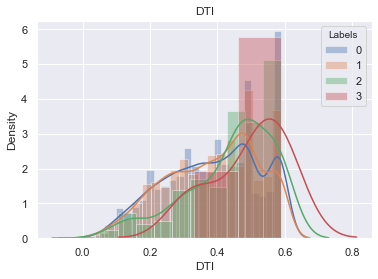

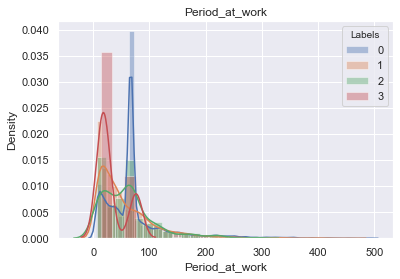

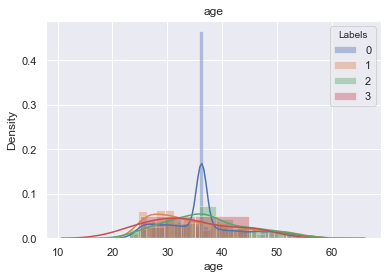

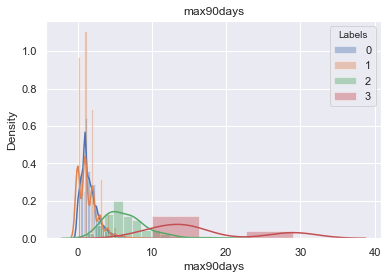

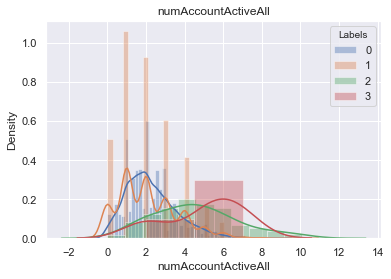

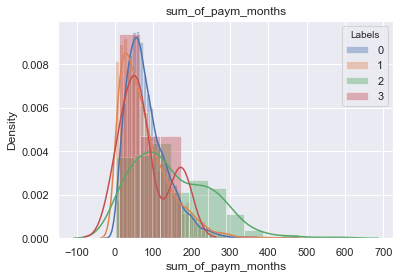

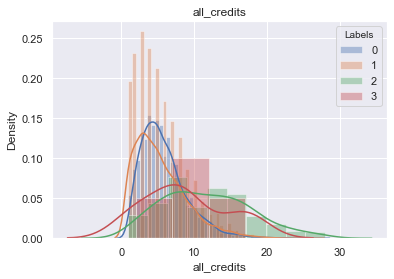

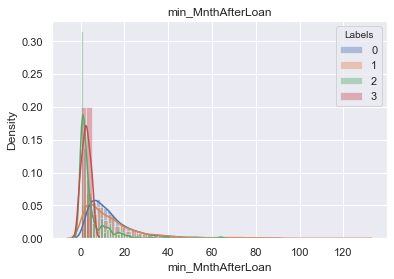

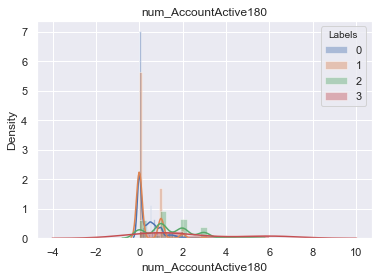

In [36]:
features = ['DTI', 'Period_at_work', 'age', 'max90days', 'numAccountActiveAll', 'sum_of_paym_months', 'all_credits',
            'min_MnthAfterLoan', 'num_AccountActive180']
for feat in features:
    for i in summary.index:
        sns.distplot(df.loc[df.predict_cluster == i, feat], label=i)
        plt.ylabel("Density")
        plt.title(feat)
    plt.legend(title='Labels')
    plt.show()

**Относительно числовых признаков можем сделать следующие выводы:**
    - больше всего значения разнятся в признаках  'DTI', 'Period_at_work', 'age', 'max90days', 'numAccountActiveAll', 'sum_of_paym_months', 'all_credits', 'min_MnthAfterLoan', 'num_AccountActive180';
    - Для кластера 0 характерно: около 80 времени за работой, возраст 36, близкое к 0 число запросов в бюро кредитных историй, 2 открытых счёта, 80 сумма плтажей за месяц, 5 кредитов, 0 активных счетов за полгода;
    - Для кластера 1: практически не работает, около 30 лет, не обращался недавно в бюро кедитных историй, различное число счетов, меньше 5 кредитов, 0 или 1 открытых активных счетов за полгода;
    - Для кластера 2: 5 раз обращается в бюро кредитных историй за 90 дней, 4 активных счета, 10 кредитов, около 0 дня без обращений;
    - Для кластера 3: самое высокое отношение DTI, большая часть без работы, давно не обращается в бюро кредитных историй, 6 активных счетов, 10 кредитов.

#### Посмотрим на распределение катеориальных переменных.

In [37]:
curr = df.groupby('predict_cluster')[[i for i in categorical]].apply(lambda x: x.mode()).dropna().T
for i in curr.index:
    if curr.loc[i].nunique() == 1:
        curr.drop(index=i, inplace=True)
display(curr)

predict_cluster,0,1,2,3
,0,0,0,0
INCOME_BASE_TYPE,2НДФЛ,Поступление зарплаты на счет,2НДФЛ,2НДФЛ
SEX,мужской,мужской,мужской,женский
EMPL_FORM,unknown,ООО,ООО,ООО
FAMILY_STATUS,unknown,женат / замужем,женат / замужем,женат / замужем
if_zalog,-1,0,0,0
dlq_exist,-1,1,1,1
thirty_in_a_year,-1,0,0,0
sixty_in_a_year,-1,0,0,0
ninety_in_a_year,-1,0,0,0


В данном случае самыми показательными являются признаки 'INCOME_BASE_TYPE', 'SEX', 'EMPL_FORM', 'FAMILY_STATUS', 'if_zalog',
       'dlq_exist', 'thirty_in_a_year', 'ninety_vintage'. Рассмотрим их подробнее.

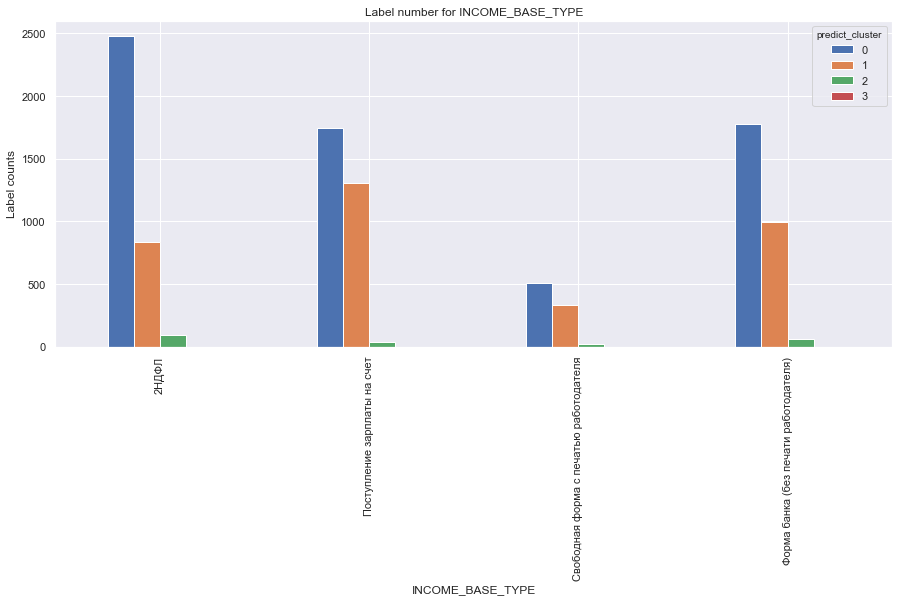

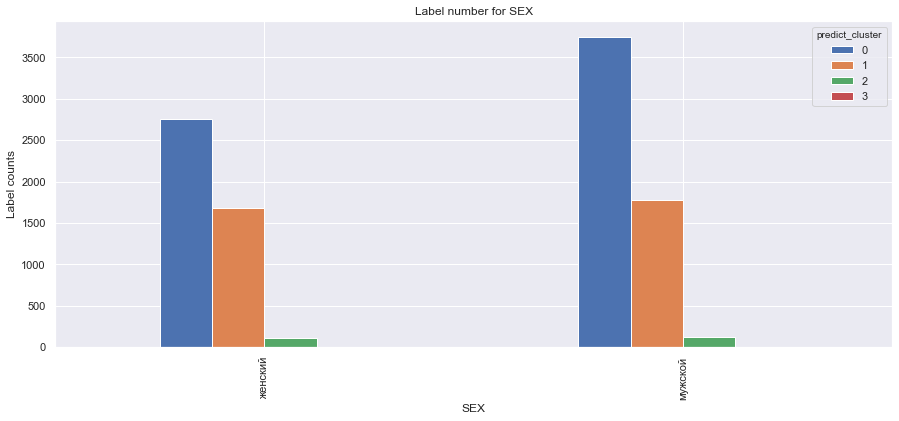

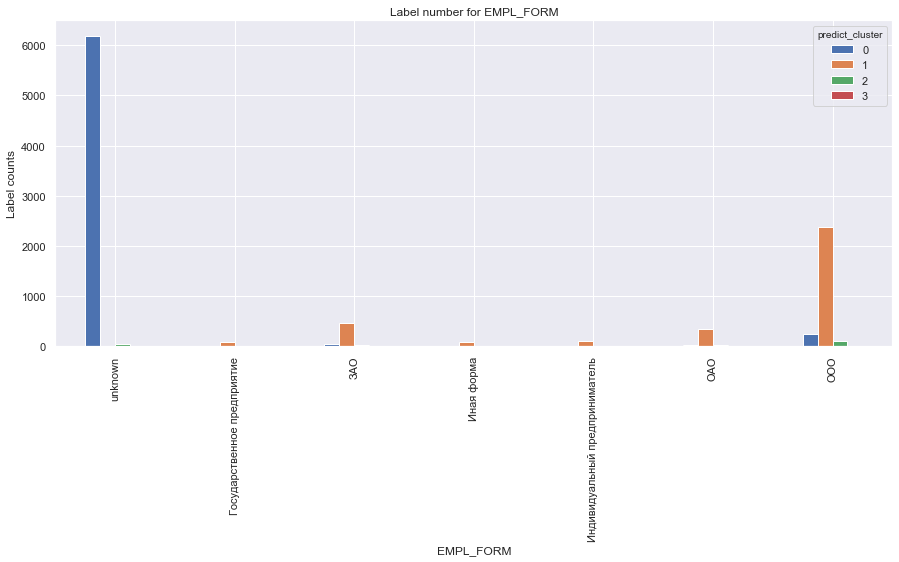

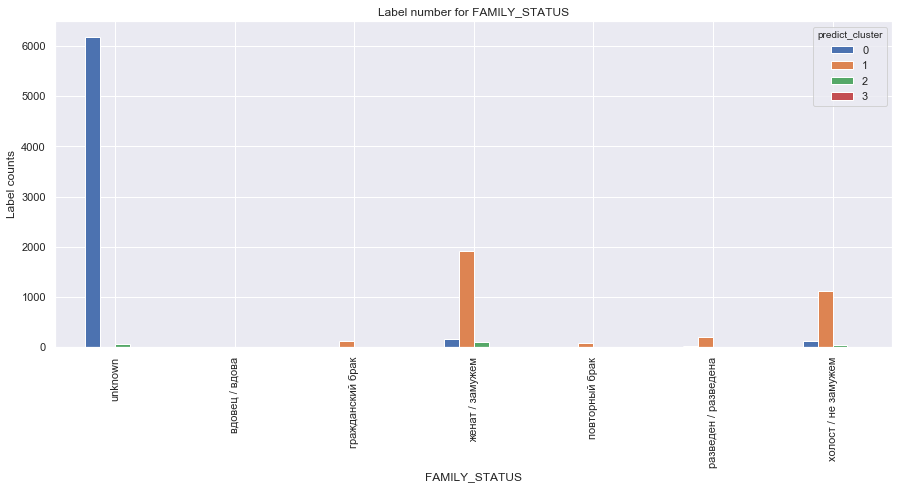

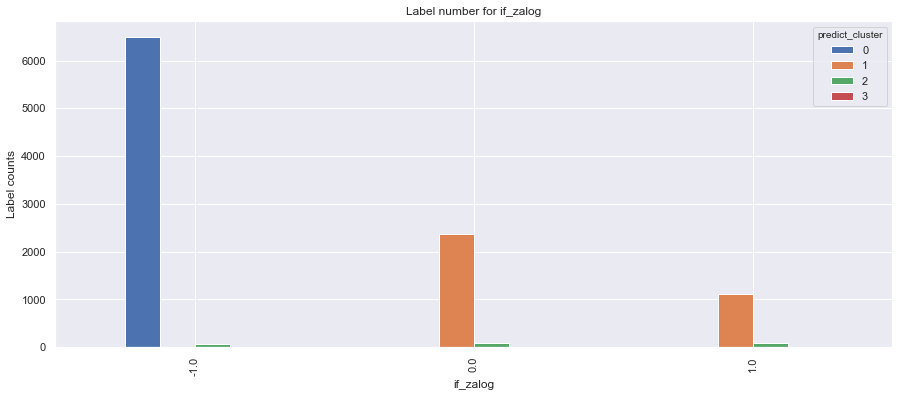

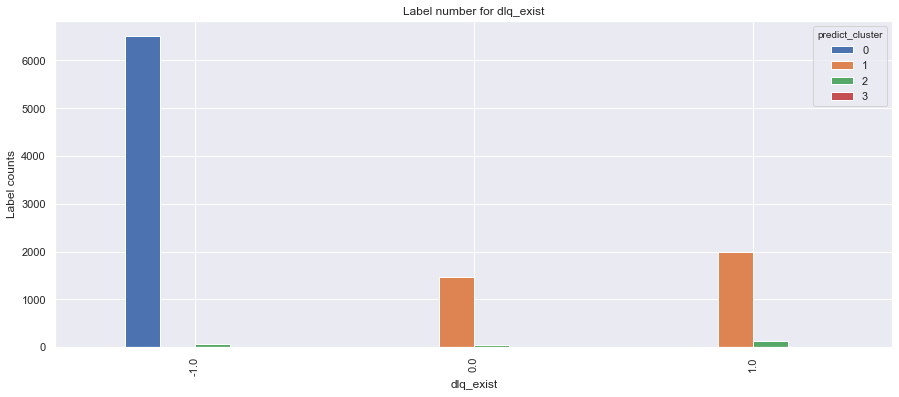

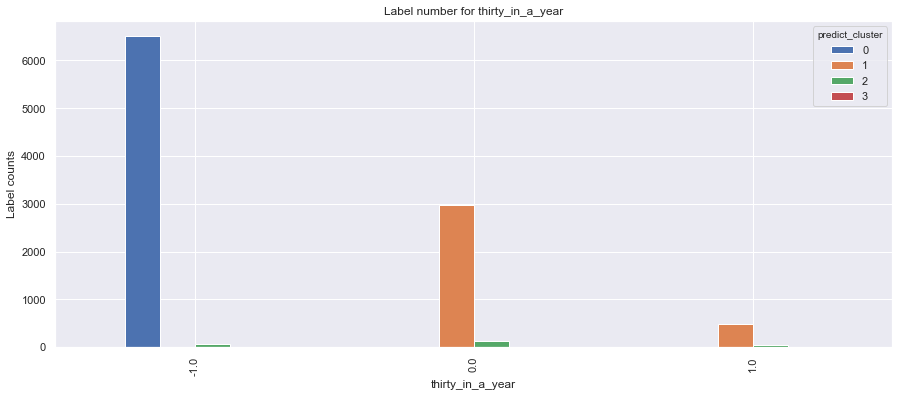

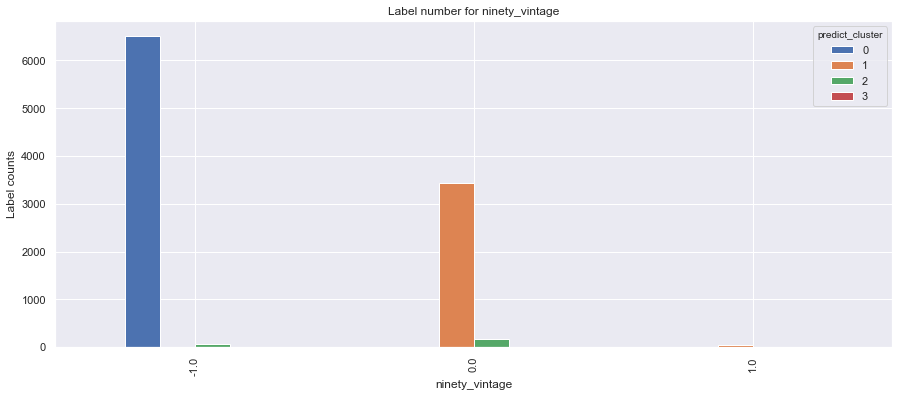

In [38]:
features = ['INCOME_BASE_TYPE', 'SEX', 'EMPL_FORM', 'FAMILY_STATUS', 'if_zalog', 'dlq_exist', 'thirty_in_a_year', 
            'ninety_vintage']
for cat in features:
    pd.crosstab(df[cat], df['predict_cluster']).plot(kind='bar', figsize=(15, 6))
    plt.title('Label number for ' + cat)
    plt.xlabel(cat)
    plt.ylabel('Label counts')
    plt.show()

**Относительно категориальных признаков можем сделать следующие выводы:**

    - больше всего значения разнятся в признаках 'INCOME_BASE_TYPE', 'SEX', 'EMPL_FORM', 'FAMILY_STATUS', 'if_zalog', 'dlq_exist', 'thirty_in_a_year', 'ninety_vintage';
    - Для кластера 0 характерно: самоя большая концентрация пропущенных значений, мужчины;
    - Для кластера 1: подтверждение дохода за счёт поступления зарплаты на счёт, организационно-правовая форма ООО, семйное положение женат/замужем, отсутсвие залога, отсутствие просрочек;
    - Для кластера 2: подтверждение дохода за счёт 2НДФЛ, женат/замужем, просрочка на данный момент;
    - Для кластера 3: женщины.

#### Из перечисленных выше особенностей нетрудно сформировать структурный портрет каждого кластера: просто объеднив описания числовых и категориальных признаков вместе.
В общем виде, кластер 1 -- самый большой, а 3 -- самый маленький, буквально несколько значений.

### Общие выводы

По поводу моделей стоит отметить, что логика разбиения на кластеры оказалась примерно идентичной, если судить по получившимся в каждом кластере значениям. Например, в 0 классе оказались данные с большинством пропущенных значений, а в первом с подтверждением дохода за счет поступления зарплаты на счет. И это еще не упоминая числовые переменные. Число кластеров тоже оказалось одинаковым. KMeans отработал заметно быстрее, но не проанализировал выборку так же хорошо, как MeanShift. Оба алгоритма показали хорошие результаты и довольно схоже распределили объём объектов между кластерами. Вообще говоря, такая работа подразумевает еще более глубокий долгий и детальный анализ: можно было бы подробнее рассмотреть попарную взаимосвзь признаков, определить целевую переменную и относительно нее строить кластеризацию с учителем и другое, но времени и сил на это уже не хватает :(

В целом в ходе работы я оставляла много комментариев и выводов при выполнении действий, поэтому не стану дублировать их здесь. 

Задание мне понравилось и показалось очень интересным, с подобным форматом анализа я ещё не сталкивалась, думаю, буду практиковаться в этом и дальше.